In [1]:
import src as SOGA
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Case 1 
The first experiments are kinda like the ones from SEFM paper.

However, the prior is the same for all people in the database (gauss(465000, 100000)).
The prior is chosen to be equal for all since an attacker might know the average for an entire population.

But the "actual" values in the database are sampled from different distributions, since there might be differences between age groups in real life.

male2130 = gauss(465000,100000 )
male3140 = gauss(475000,100000 )
male4150 = gauss(485000,100000 )
male5160 = gauss(495000,100000 )
female2130 = gauss(460000,100000 )

We have 3 different scenarios with gradually more information for the attacker to observe
Scenario 1: Average for poluation
Scenario 2: Average for poluation + average for males
Scenario 3: Average for poluation + average for males + average for male 21-30

For each scenario we plot the posterior of the age group 21-30 (We coould also plot posterior for other age groups?)
We also plot all the actual values as lines. Blue lines are values from people in age group 21-30 and black lines for everyone else.



In [2]:
compiled_case_1_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment1.soga')
cfg_case_1_exp1 = SOGA.produce_cfg(compiled_case_1_exp1)
output_dist_case_1_exp1 = SOGA.start_SOGA(cfg_case_1_exp1)

compiled_case_1_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment2.soga')
cfg_case_1_exp2 = SOGA.produce_cfg(compiled_case_1_exp2)
output_dist_case_1_exp2 = SOGA.start_SOGA(cfg_case_1_exp2)

compiled_case_1_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment3.soga')
cfg_case_1_exp3 = SOGA.produce_cfg(compiled_case_1_exp3)
output_dist_case_1_exp3 = SOGA.start_SOGA(cfg_case_1_exp3)

In [3]:
#The acutal sampled values:
meanm2130 = [553663., 433856., 713989., 471166., 435411., 745048., 577540., 540576., 442278., 504165.] 
meanm3140 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

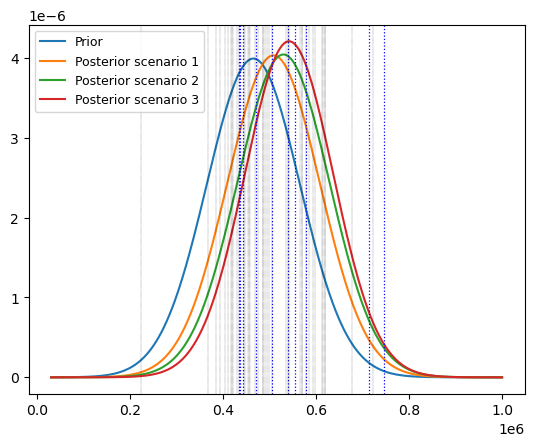

In [4]:
x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_1_exp1.gm.marg_pdf(x, 0)

prior2 = norm.pdf(x, loc=465000, scale=100000)
posterior2 = output_dist_case_1_exp2.gm.marg_pdf(x, 0)

prior3 = norm.pdf(x, loc=465000, scale=100000)
posterior3 = output_dist_case_1_exp3.gm.marg_pdf(x, 0)

plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1, label='Posterior scenario 1')
plt.plot(x, posterior2, label='Posterior scenario 2')
plt.plot(x, posterior3, label='Posterior scenario 3')

w = 0.3
w2130 = 0.9
for val in meanm2130:
    plt.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

plt.legend(loc="upper left",  fontsize="9")

### Calculating the effect sizes of the 3 cases
To calculate effect sizes we use Cohen's d (x1 - x2)/std where x1 is the mean of the prior and x2 is the mean of the posteror and std is the standard deviation of the posterior

In [5]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_1_exp1.gm.mean()[0])/np.sqrt(output_dist_case_1_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_1_exp2.gm.mean()[0])/np.sqrt(output_dist_case_1_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_1_exp3.gm.mean()[0])/np.sqrt(output_dist_case_1_exp3.gm.cov()[0][0])}')



effect size case 1: -0.4382960977083031
effect size case 2: -0.655166921420285
effect size case 3: -0.8092184204966606


## Case 2 

In the second experiment we create an outlier in the group male2130 by manually changing the value to 999999.
We can see that for scenario 1 and 2 (all people and all males) this does not have any visible effect.
It is only when we add the observation for all people in age group male2130 it changes a bit.
Perhaps a single outlier is not enough.

The outlier is the red dotted line in the plot

In [6]:
compiled_case_2_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment1.soga')
cfg_case_2_exp1 = SOGA.produce_cfg(compiled_case_2_exp1)
output_dist_case_2_exp1 = SOGA.start_SOGA(cfg_case_2_exp1)

compiled_case_2_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment2.soga')
cfg_case_2_exp2 = SOGA.produce_cfg(compiled_case_2_exp2)
output_dist_case_2_exp2 = SOGA.start_SOGA(cfg_case_2_exp2)

compiled_case_2_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment3.soga')
cfg_case_2_exp3 = SOGA.produce_cfg(compiled_case_2_exp3)
output_dist_case_2_exp3 = SOGA.start_SOGA(cfg_case_2_exp3)

In [7]:
#The acutal sampled values:
meanm2130_2 = [999999., 433856., 713989., 471166., 435411., 745048., 577540., 540576., 442278., 504165.] 
meanm3140_2 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_2 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_2 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_2 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

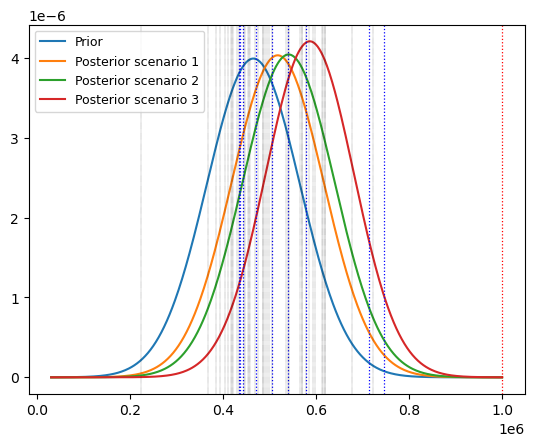

In [8]:
x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_2_exp1.gm.marg_pdf(x, 0)

prior2 = norm.pdf(x, loc=465000, scale=100000)
posterior2 = output_dist_case_2_exp2.gm.marg_pdf(x, 0)

prior3 = norm.pdf(x, loc=465000, scale=100000)
posterior3 = output_dist_case_2_exp3.gm.marg_pdf(x, 0)

plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1, label='Posterior scenario 1')
plt.plot(x, posterior2, label='Posterior scenario 2')
plt.plot(x, posterior3, label='Posterior scenario 3')

w = 0.3
w2130 = 0.9
for val in meanm2130_2:
    if(val == 999999):
        plt.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
    else:
        plt.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140_2:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150_2:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160_2:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130_2:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

plt.legend(loc="upper left",  fontsize="9")

In [9]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_2_exp1.gm.mean()[0])/np.sqrt(output_dist_case_2_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_2_exp2.gm.mean()[0])/np.sqrt(output_dist_case_2_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_2_exp3.gm.mean()[0])/np.sqrt(output_dist_case_2_exp3.gm.cov()[0][0])}')



effect size case 1: -0.5284695869333544
effect size case 2: -0.7681724309569479
effect size case 3: -1.2796978744062995


## Case 3

Varying group sizes. This experiment contains an outlier like in case 2. But now we reduce the group size gradually.

In [10]:
compiled_case_3_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment1.soga')
cfg_case_3_exp1 = SOGA.produce_cfg(compiled_case_3_exp1)
output_dist_case_3_exp1 = SOGA.start_SOGA(cfg_case_3_exp1)

compiled_case_3_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment2.soga')
cfg_case_3_exp2 = SOGA.produce_cfg(compiled_case_3_exp2)
output_dist_case_3_exp2 = SOGA.start_SOGA(cfg_case_3_exp2)

compiled_case_3_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment3.soga')
cfg_case_3_exp3 = SOGA.produce_cfg(compiled_case_3_exp3)
output_dist_case_3_exp3 = SOGA.start_SOGA(cfg_case_3_exp3)

In [36]:
compiled_case_3_exp4 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment4.soga')
cfg_case_3_exp4 = SOGA.produce_cfg(compiled_case_3_exp4)
output_dist_case_3_exp4 = SOGA.start_SOGA(cfg_case_3_exp4)

compiled_case_3_exp5 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment5.soga')
cfg_case_3_exp5 = SOGA.produce_cfg(compiled_case_3_exp5)
output_dist_case_3_exp5 = SOGA.start_SOGA(cfg_case_3_exp5)

compiled_case_3_exp6 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment6.soga')
cfg_case_3_exp6 = SOGA.produce_cfg(compiled_case_3_exp6)
output_dist_case_3_exp6 = SOGA.start_SOGA(cfg_case_3_exp6)

In [12]:
#The acutal sampled values with 7 people in male2130 group:
meanm2130_3 = [999999., 433856., 713989., 471166., 435411., 745048., 577540.] 
meanm3140_3 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_3 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_3 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_3 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

In [16]:
#The acutal sampled values with 5 people in male2130 group:
meanm2130_3b = [999999., 433856., 713989., 471166., 435411.] 
meanm3140_3b = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_3b = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_3b = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_3b = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

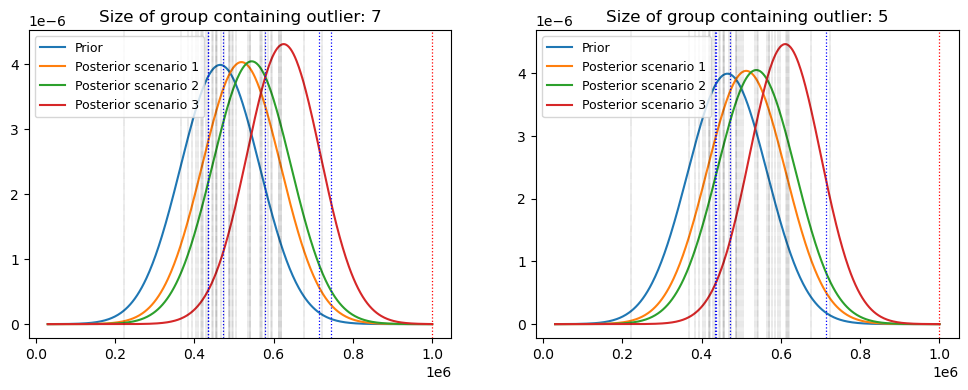

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(30000,1000000,500)
ax1.title.set_text('Size of group containing outlier: 7')
ax2.title.set_text('Size of group containing outlier: 5')
#######################################################
#### Plotting for group with 7 people
#######################################################
prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_3_exp1.gm.marg_pdf(x, 0)

posterior2 = output_dist_case_3_exp2.gm.marg_pdf(x, 0)

posterior3 = output_dist_case_3_exp3.gm.marg_pdf(x, 0)

ax1.plot(x, prior1, label='Prior')
ax1.plot(x, posterior1, label='Posterior scenario 1')
ax1.plot(x, posterior2, label='Posterior scenario 2')
ax1.plot(x, posterior3, label='Posterior scenario 3')

w = 0.3
w2130 = 0.9
for val in meanm2130_3:
    if(val == 999999):
        ax1.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
    else:
        ax1.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140_3:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150_3:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160_3:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130_3:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

ax1.legend(loc="upper left",  fontsize="9")

#######################################################
#### Plotting for group with 5 people
#######################################################

posterior1b = output_dist_case_3_exp4.gm.marg_pdf(x, 0)
posterior2b = output_dist_case_3_exp5.gm.marg_pdf(x, 0)
posterior3b = output_dist_case_3_exp6.gm.marg_pdf(x, 0)


ax2.plot(x, prior1, label='Prior')
ax2.plot(x, posterior1b, label='Posterior scenario 1')
ax2.plot(x, posterior2b, label='Posterior scenario 2')
ax2.plot(x, posterior3b, label='Posterior scenario 3')

for val in meanm2130_3b:
    if(val == 999999):
        ax2.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
    else:
        ax2.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140_3b:
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150_3b:
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160_3b:
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130_3b:
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

ax2.legend(loc="upper left",  fontsize="9")



In [40]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_3_exp1.gm.mean()[0])/np.sqrt(output_dist_case_3_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_3_exp2.gm.mean()[0])/np.sqrt(output_dist_case_3_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_3_exp3.gm.mean()[0])/np.sqrt(output_dist_case_3_exp3.gm.cov()[0][0])}')
#Scenario 1b
print(f'effect size case 1b: {(465000 - output_dist_case_3_exp4.gm.mean()[0])/np.sqrt(output_dist_case_3_exp4.gm.cov()[0][0])}')
#Scenario 2b
print(f'effect size case 2b: {(465000 - output_dist_case_3_exp5.gm.mean()[0])/np.sqrt(output_dist_case_3_exp5.gm.cov()[0][0])}')
#Scenario 3b
print(f'effect size case 3b: {(465000 - output_dist_case_3_exp6.gm.mean()[0])/np.sqrt(output_dist_case_3_exp6.gm.cov()[0][0])}')



effect size case 1: -0.5427780468082044
effect size case 2: -0.8061082418237969
effect size case 3: -1.73129747421386
effect size case 1b: -0.4789479870794367
effect size case 2b: -0.739043125870075
effect size case 3b: -1.6310349402158735


## Case 4 Differential privacy. Try different epsilons and amount of noise (variance) vs utility 

We apply DP with the Gaussian mechanism to the 3 scenarios with a group size of 7 from case 3.
Gaussian mechanism is calculated as follows: σ^2 = 2∆^2 log(1.25/δ)/ϵ^2.

We will try with different values for epsilon which should produce different variances for the noise distribution.


The actual values used in the experiment:

In [15]:
meanm2130_4 = [999999., 433856., 713989., 471166., 435411., 745048., 577540.] 
meanm3140_4 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_4 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_4 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_4 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

In [60]:
def calculate_noise(db, epsilon): 
    max_income  = max(db)
    min_income  = min(db)
    size_db     = len(db)
    sensitivity = (max_income - min_income) / size_db 
    delta       = 1 / (size_db ** 2)
    variance    = (2*(sensitivity**2)*np.log(1.25/delta)) / epsilon**2
    return variance

db_male_21_30_4 = meanm2130_4
db_all_male     = meanm2130_4 + meanm3140_4 + meanm4150_4 + meanm5160_4
db_all          = meanm2130_4 + meanm3140_4 + meanm4150_4 + meanm5160_4 + meanf2130_4
print(f'DB = male group 21-30, ϵ = 1 and variance = {calculate_noise(db_male_21_30_4, 1)}')
print(f'DB = male group 21-30, ϵ = 0.5 and variance =  = {calculate_noise(db_male_21_30_4, 0.5)}')
print(f'DB = male group 21-30, ϵ = 0.3 and variance = {calculate_noise(db_male_21_30_4, 0.3)}')
print()
print(f'DB = all male, ϵ = 1 and variance = {calculate_noise(db_all_male, 1)}')
print(f'DB = all male, ϵ = 0.5 and variance =  = {calculate_noise(db_all_male, 0.5)}')
print(f'DB = all male, ϵ = 0.3 and variance = {calculate_noise(db_all_male, 0.3)}')
print()
print(f'DB = all, ϵ = 1 and variance = {calculate_noise(db_all, 1)}')
print(f'DB = all, ϵ = 0.5 and variance =  = {calculate_noise(db_all, 0.5)}')
print(f'DB = all, ϵ = 0.3 and variance = {calculate_noise(db_all, 0.3)}')

DB = male group 21-30, ϵ = 1 and variance = 53833451305.360344
DB = male group 21-30, ϵ = 0.5 and variance =  = 215333805221.44138
DB = male group 21-30, ϵ = 0.3 and variance = 598149458948.4482

DB = all male, ϵ = 1 and variance = 4359893005.051125
DB = all male, ϵ = 0.5 and variance =  = 17439572020.2045
DB = all male, ϵ = 0.3 and variance = 48443255611.67916

DB = all, ϵ = 1 and variance = 4334263030.198959
DB = all, ϵ = 0.5 and variance =  = 17337052120.795837
DB = all, ϵ = 0.3 and variance = 48158478113.32177


In [89]:
compiled_case_4_exp1a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1a.soga')
cfg_case_4_exp1a = SOGA.produce_cfg(compiled_case_4_exp1a)
output_dist_case_4_exp1a = SOGA.start_SOGA(cfg_case_4_exp1a)

compiled_case_4_exp1b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1b.soga')
cfg_case_4_exp1b = SOGA.produce_cfg(compiled_case_4_exp1b)
output_dist_case_4_exp1b = SOGA.start_SOGA(cfg_case_4_exp1b)

compiled_case_4_exp1c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1c.soga')
cfg_case_4_exp1c = SOGA.produce_cfg(compiled_case_4_exp1c)
output_dist_case_4_exp1c = SOGA.start_SOGA(cfg_case_4_exp1c)


compiled_case_4_exp2a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2a.soga')
cfg_case_4_exp2a = SOGA.produce_cfg(compiled_case_4_exp2a)
output_dist_case_4_exp2a = SOGA.start_SOGA(cfg_case_4_exp2a)

compiled_case_4_exp2b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2b.soga')
cfg_case_4_exp2b = SOGA.produce_cfg(compiled_case_4_exp2b)
output_dist_case_4_exp2b = SOGA.start_SOGA(cfg_case_4_exp2b)

compiled_case_4_exp2c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2c.soga')
cfg_case_4_exp2c = SOGA.produce_cfg(compiled_case_4_exp2c)
output_dist_case_4_exp2c = SOGA.start_SOGA(cfg_case_4_exp2c)


compiled_case_4_exp3a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3a.soga')
cfg_case_4_exp3a = SOGA.produce_cfg(compiled_case_4_exp3a)
output_dist_case_4_exp3a = SOGA.start_SOGA(cfg_case_4_exp3a)

compiled_case_4_exp3b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3b.soga')
cfg_case_4_exp3b = SOGA.produce_cfg(compiled_case_4_exp3b)
output_dist_case_4_exp3b = SOGA.start_SOGA(cfg_case_4_exp3b)

compiled_case_4_exp3c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3c.soga')
cfg_case_4_exp3c = SOGA.produce_cfg(compiled_case_4_exp3c)
output_dist_case_4_exp3c = SOGA.start_SOGA(cfg_case_4_exp3c)



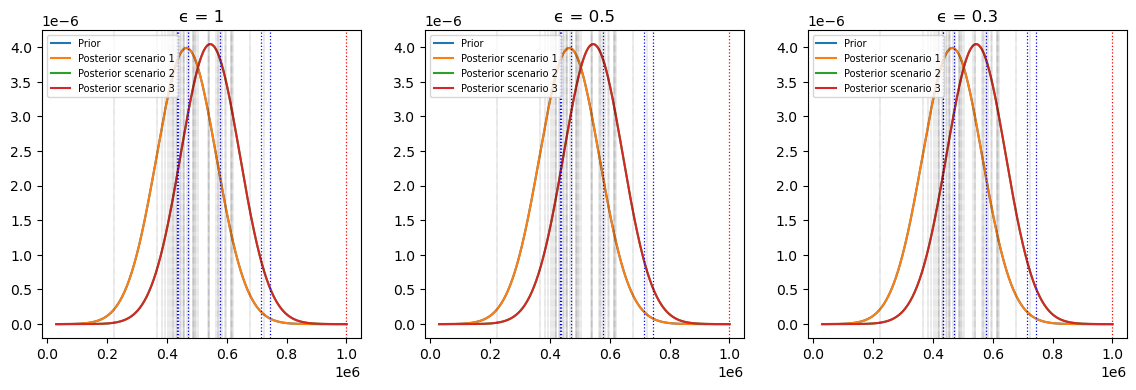

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.title.set_text('ϵ = 1')
ax2.title.set_text('ϵ = 0.5')
ax3.title.set_text('ϵ = 0.3')

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1a = output_dist_case_4_exp1a.gm.marg_pdf(x, 0)
posterior1b = output_dist_case_4_exp1b.gm.marg_pdf(x, 0)
posterior1c = output_dist_case_4_exp1c.gm.marg_pdf(x, 0)

posterior2a = output_dist_case_4_exp2a.gm.marg_pdf(x, 0)
posterior2b = output_dist_case_4_exp2b.gm.marg_pdf(x, 0)
posterior2c = output_dist_case_4_exp2c.gm.marg_pdf(x, 0)

posterior3a = output_dist_case_4_exp3a.gm.marg_pdf(x, 0)
posterior3b = output_dist_case_4_exp3b.gm.marg_pdf(x, 0)
posterior3c = output_dist_case_4_exp3c.gm.marg_pdf(x, 0)

ax1.plot(x, prior1, label='Prior')
ax2.plot(x, prior1, label='Prior')
ax3.plot(x, prior1, label='Prior')

ax1.plot(x, posterior1a, label='Posterior scenario 1')
ax1.plot(x, posterior2a, label='Posterior scenario 2')
ax1.plot(x, posterior3a, label='Posterior scenario 3')


ax2.plot(x, posterior1b, label='Posterior scenario 1')
ax2.plot(x, posterior2a, label='Posterior scenario 2')
ax2.plot(x, posterior3a, label='Posterior scenario 3')

ax3.plot(x, posterior1c, label='Posterior scenario 1')
ax3.plot(x, posterior2c, label='Posterior scenario 2')
ax3.plot(x, posterior3c, label='Posterior scenario 3')

w = 0.3
w2130 = 0.9
for val in meanm2130_4:
    if(val == 999999):
        ax1.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
        ax2.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
        ax3.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)
    else:
        ax1.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
        ax2.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
        ax3.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140_4:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax3.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150_4:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax3.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160_4:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax3.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130_4:
    ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
    ax3.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

ax1.legend(loc="upper left",  fontsize="7")
ax2.legend(loc="upper left",  fontsize="7")
ax3.legend(loc="upper left",  fontsize="7")